In [1]:
from mesh import Mesh

In [2]:
#minimal
#filename, quality_index = "Data/simplicial_donut_3.ply", 2
#small
#filename, quality_index = "Data/simplicial_donut_3_deform.ply", 2
filename, quality_index = "Data/31_r1.00_n4_v256.volume.ply", 3
#filename, quality_index = "Data/31_mean_curvature.ply", 7
#medium
#filename, quality_index = "Data/HS_0109_HeiCuBeDa_GigaMesh.ply", 3
#filename, quality_index = "Data/HS_0109_HeiCuBeDa_GigaMesh_mean_curvature.ply", 7
#large:
#filename, quality_index = "Data/HS_190_HeiCuBeDa_GigaMesh.ply", 3

# Mesh class:
The Mesh class can be initialized using **Mesh()** . It has the following variables and functions:

## Variables:
- **Mesh.filename** filename as string. saved without .ply, but with folder structure

- **Mesh.Vertices** Vertices stored as a dictionary of Vertex objects, keys are Vertex indices

- **Mesh.Edges** Edges stored as a dictionary of Edge objects, keys are numbered

- **Mesh.Faces** Faces stored as a dictionary of Face objects, keys are numbered

- **Mesh.MorseComplex** if not calculated yet: None, otherwise a MorseComplex object with MorseComplex.persistence = 0

- **Mesh.reducedMorseComplexes** a dictionary of MorseComplex objects, that have been reduced by a persistence parameter. The persistence parameter also defines the key of each MorseComplex object

- **Mesh.MorseCells** a dictionary of MorseCells dictionaries. the key for each MorseCell dictionary is given by the persistence of the MorseComplex, these Cells were taken from. Each MorseCell dictionary consits of key, value pairs, where the key gives the label of a cell and the value is a set of vertices that make up this cell.

## Functions:
- **Mesh.load_mesh_ply(filename, quality_index)** loads a .ply file into the Mesh class and takes the value given at quality_index position as the scalar function on the vertices

- **Mesh.info()** prints out Mesh info

- **Mesh.ProcessLowerStars()** calculates the combinatorial gradient and critical simplices; **required for ExtractMorseComplex**

- **Mesh.only_return_ExtractMorseComplex** return MorseComplex without storing it in the Mesh class

- **Mesh.ExtractMorseComplex** calculate MorseComplex and store it in the Mesh class

- **Mesh.only_return_ReducedMorseComplex(persistence)** reduce the MorseComplex based on the given persistence parameter, but dont store it in the Mesh class

- **Mesh.ReducedMorseComplex(persistence)** reduce the MorseComplex based on the given persistence parameter, and store it in the Mesh class

- **Mesh.plot_MorseComplex(MorseComplex, filename, path_color=[255,0,255])** plots the critical simplices of a MorseComplex in red (vertex), green (edge) and blue (face) and the according paths connecting them in magenta. Only writes a ply file containing colored points, so should be used as an overlay for the original mesh

- **Mesh.ExtractMorseCells(MorseComplex)** takes a MorseComplex and gets all connected cells individually that are enclosed by the lines between critical simplices

- **Mesh.plot_MorseCells(persistence, filename)** plots the connected components in each Cell in the same color. Only writes a ply file containing colored points, so should be used as an overlay for the original mesh

In [3]:
Mesh = Mesh()
Mesh.load_mesh_ply(filename, quality_index)
Mesh.info()
Mesh.ProcessLowerStars()
Mesh.ExtractMorseComplex()
Mesh.MorseComplex.info()

Time read data file: 4.176514299999999
Time read and prepare data: 10.2966797
+-------------------------------------------------------
| Mesh Info
+-------------------------------------------------------
| Filename:  Data/31_r1.00_n4_v256.volume
| Morse function values range:  [-0.5752798, 0.6062798]
+-------------------------------------------------------
| Number of Vertices:  146174
| Number of Edges:  438516
| Number of Faces:  292344
+-------------------------------------------------------
| Euler characteristic:  2
+-------------------------------------------------------
Time ProcessLowerStar: 4.234364000000001
Time ExtractMorseComplex and Separatrices: 2.7085965000000023
+-------------------------------------------------------
| MorseComplex Info
+-------------------------------------------------------
| Filename:  Data/31_r1.00_n4_v256.volume
| Persistence of this Complex:  0
+-------------------------------------------------------
| Number of Vertices:  8878
| Number of Edges:

In [4]:
red_MSC = Mesh.ReducedMorseComplex(1.5)

Time cancel critical points with  1.5  persistence:  2.490191799999998
Persistence was higher than the range of function values, therefore this complex is maximally reduced and can be used for salient edge extraction.


In [5]:
print(len(red_MSC.Separatrices))

21092


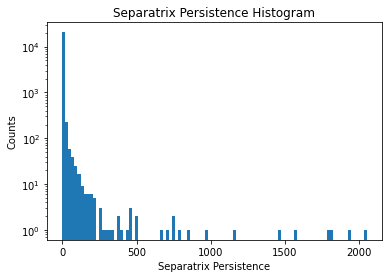

In [6]:
Mesh.plot_salient_edge_histogram(100, log=True)

In [7]:
#red_MSC.Separatrices.sort(key=lambda x: x[0])
#for pers,sep in red_MSC.Separatrices:
#    print(pers)


In [8]:
#thr = [0.2,0.5,0.8,1,2,5,10]
#for thresh in thr:
#    Mesh.plot_salient_edge(red_MSC, str(red_MSC.filename)+"salient_edge_test_squared_sum"+str(thresh), thresh)

In [9]:
#M = {}
#M[0] = {k: v for k, v in sorted(Mesh.reducedMorseComplexes[0.05].CritVertices.items(), key=lambda item: item[1].fun_val)}
#M[1] = {k: v for k, v in sorted(Mesh.reducedMorseComplexes[0.05].CritEdges.items(), key=lambda item: item[1].fun_val)}
#M[2] = {k: v for k, v in sorted(Mesh.reducedMorseComplexes[0.05].CritFaces.items(), key=lambda item: item[1].fun_val)}

In [10]:
# Calculate reduced Complexes for different persistence levels:

persistences = [0.04,0.06,0.1,0.2]
for thresh in persistences:
    Mesh.ReducedMorseComplex(thresh)
    
# plot MorseComplexes, calculate MorseCells and plot MorseCells
for persistence, reduced_complex in Mesh.reducedMorseComplexes.items():
    #reduced_complex.info()
    #Mesh.plot_MorseComplex(reduced_complex, str(reduced_complex.filename)+"_complex_cancelling_"+str(persistence))
    
    Mesh.ExtractMorseCells(reduced_complex)
    Mesh.write_MorseCellLabels(persistence, str(reduced_complex.filename)+"_test"+str(persistence))
    #Mesh.plot_MorseCells(persistence, str(reduced_complex.filename)+"_"+str(persistence))


Time cancel critical points with  0.04  persistence:  2.3769431999999995
Time cancel critical points with  0.06  persistence:  1.4000558000000005
Time cancel critical points with  0.1  persistence:  1.0903516999999994
Time cancel critical points with  0.2  persistence:  0.8185399999999987
Time get MorseCells:  0.8299571000000014
Time writing label txt file: 0.1130925999999981
Time get MorseCells:  0.919883500000001
Time writing label txt file: 0.15129729999999952
Time get MorseCells:  0.7992729999999995
Time writing label txt file: 0.14987290000000186
Time get MorseCells:  0.6833775000000024
Time writing label txt file: 0.145066700000001
Time get MorseCells:  0.8137742999999986
Time writing label txt file: 0.1288292999999996
